# Distances

A common task when dealing with data is computing the distance between two points.

We can use [`scipy.spatial.distance`](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) to compute a variety of distances.

In [26]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance

A data set is a collection of observations, each of which may have several features.  We'll consider the situation where the data set is a matrix `X`, where each row `X[i]` is an observation.  We'll use `n` to denote the number of observations and `p` to denote the number of features, so `X` is a $n \times p$ matrix.

For example, we might sample from a circle (with some gaussian noise)

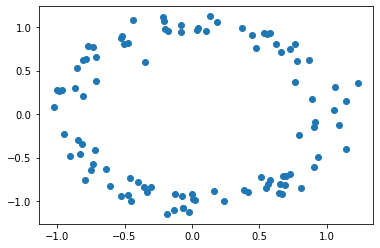

In [2]:
def sample_circle(n, r=1, sigma=0.1):
    """
    sample n points from a circle of radius r
    add Gaussian noise with variance sigma^2
    """
    X = np.random.randn(n,2)
    X = r * X / np.linalg.norm(X,axis=1).reshape(-1,1)
    return X + sigma * np.random.randn(n,2)

X = sample_circle(100)
plt.scatter(X[:,0], X[:,1])
plt.show()

We might also call a data set a "point cloud", or a collection of points in some space.

## Similarity, Dissimilarity, and Metric

A **similarity** between two points $x, y\in X$ is a function $s: X \times X \to \mathbb{R}$, where $s$ is larger if $x,y$ are more similar.

**Cosine similarity** is an an example of similarity for points in a real vector space.  We can define it as
\begin{equation}
c(x,y) = \frac{x^T y}{\|x\|_2 \|y\|_2}
\end{equation}

Note $c(x,x) = 1$, and if $x,y$ are orthogonal, then $c(x,y) = 0$.

A **dissimilarity** between two points $x,y \in X$ is a function $d: X \times X \to \mathbb{R}_+$, where $d$ is smaller if $x,y$ are more similar.  Sometimes, disimilarity functions will be called **distances**.

**Cosine distance** is an example of a dissimilarity for points in a real vector space.  It is defined as
\begin{equation}
d(x,y) = 1 - c(x,y)
\end{equation}
Note $d(x,x) = 0$, and $d(x,y) = 1$ if $x,y$ are orthogonal.

A **metric** is a disimilarity $d$ that satisfies the metric axioms
1. $d(x,y) = 0$ iff $x=y$ (identity)
2. $d(x,y) = d(y,x)$ (symmetry)
3. $d(x,y) \le d(x,z) + d(z,y)$ (triangle inequality)

You are probably most familiar with the Euclidean metric
\begin{equation}
d(x,y) = \|x - y\|_2
\end{equation}

### Exercise

Write functions for the cosine similarity, cosine distance, and euclidean distance between two numpy arrays treated as vectors.

In [ ]:
## Your code here


### Computing Distances

SciPy provides a variety of functionality for computing distances in [`scipy.spatial.distance`](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html).

In [3]:
x = [1.0, 0.0]
y = [0.0, 1.0]

distance.euclidean(x, y) # sqrt(2)

1.4142135623730951

In [4]:
distance.cosine(x, y)

1.0

the $L_1$ / Manhattan / City block distance
\begin{equation}
d(x,y) = \|x - y\|_1 = \sum_i |x_i - y_i|
\end{equation}

In [6]:
distance.cityblock(x, y)

2.0

The $L_\infty$ / Chebyshev distance
\begin{equation}
d(x,y) = \|x - y\|_\infty = \max_i |x_i - y_i|
\end{equation}

In [7]:
distance.chebyshev(x, y)

1.0

More generally, the Minkowski distance
\begin{equation}
d(x,y) = \|x - y\|_p = \big( \sum_i (x_i - y_i)^p \big)^{1/p}
\end{equation}

In [10]:
distance.minkowski(x, y, 3)

1.2599210498948732

In [12]:
np.cbrt(2) # cube root of 2

1.2599210498948734

The [Mahalanobis distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html#scipy.spatial.distance.mahalanobis).  Note that this is defined in terms of an inverse covariance matrix.  In fact, you can use it to compute distances based on the $A$-norm where $A$ is any symmetric positive definite (SPD) matrix.

\begin{equation}
d(x,y) = \| x- y \|_A = \sqrt{(x - y)^T A (x - y)}
\end{equation}

In [9]:
A = np.random.randn(3,2)
A = A.T @ A
distance.mahalanobis(x, y, A)

2.752139505692524

You can also weight many distances with a vector $w$.  The entry $w_i$ will weight the comparison between the $i$th entries of $x$ and $y$.  E.g. weighted euclidean distance
\begin{equation}
d(x, y; w) = \sqrt{\sum_i w_i(x_i - y_i)^2}
\end{equation}

In [15]:
w = [1, 2]
for d in (distance.euclidean, distance.cityblock, lambda x, y, w : distance.minkowski(x, y, 3, w)):
    print(d(x, y, w))

1.7320508075688774
3.0
1.4422495703074083


### Exercise

Compute a weighted euclidean distance using the Mahalanobis distance.

In [ ]:
## Your code here


## Pairwise Distances

In general, we often want to compute distances between many points all at once. This typically boils down to computing a matrix $D$, where $D_{i,j} = d(x_i, x_j)$.  

Here's a simple function that would do just that

In [16]:
def pairwise(X, dist=distance.euclidean):
    """
    compute pairwise distances in n x p numpy array X
    """
    n, p = X.shape
    D = np.empty((n,n), dtype=np.float64)
    for i in range(n):
        for j in range(n):
            D[i,j] = dist(X[i], X[j])
            
    return D

In [18]:
X = sample_circle(5)
pairwise(X)

array([[0.        , 1.35265694, 0.04354453, 2.11768326, 2.17466927],
       [1.35265694, 0.        , 1.30915202, 1.46703377, 1.70918977],
       [0.04354453, 1.30915202, 0.        , 2.08501659, 2.14658828],
       [2.11768326, 1.46703377, 2.08501659, 0.        , 0.31950946],
       [2.17466927, 1.70918977, 2.14658828, 0.31950946, 0.        ]])

In [19]:
pairwise(X, dist=lambda x, y : distance.minkowski(x, y, 3, [1.0, 2.0]))

array([[0.        , 1.52813873, 0.04995077, 2.59509801, 2.56175788],
       [1.52813873, 0.        , 1.47822326, 1.43795991, 1.64845923],
       [0.04995077, 1.47822326, 0.        , 2.54729259, 2.51620815],
       [2.59509801, 1.43795991, 2.54729259, 0.        , 0.31698526],
       [2.56175788, 1.64845923, 2.51620815, 0.31698526, 0.        ]])

There are a couple of inneficiencies above:
1. D is symmetric (we do redundant computation)
2. For some metrics, it can be more efficient to compute many distances at once

As an example of point 2, pairwise euclidean distances are
\begin{equation}
d(x_i, x_j) = \sqrt{(x_i - x_j)^T (x_i -x_j)}\\
= \sqrt{x_i^T x_i - 2 x_i^T x_j + x_j^T x_j}
\end{equation}

Let $x^2$ denote the vector of length $n$ where $x_i^2 = x_i^T x_i$, and let $1$ denote the vector of ones (of length $n$).  Then
\begin{equation}
D = \sqrt{1 x^{2T} + x^2 1^T - 2 X X^T}
\end{equation}

Thus, we can take advantage of BLAS level 3 operations to compute the distance matrix

In [27]:
def pairwise_euclidean(X):
    """
    Compute pairwise euclidean distances in X
    """
    XXT = X @ X.T
    x2 = np.diag(XXT)
    one = np.ones(X.shape[0])
    D = np.outer(x2, one) + np.outer(one, x2) - 2*XXT
    return np.sqrt(D)

la.norm(pairwise_euclidean(X) - pairwise(X))

1.0152623829513476e-15

We can also use [BLAS syr2](http://www.netlib.org/lapack/explore-html/d7/d15/group__double__blas__level2_gae96880c53b8eaee70bbef273b905715f.html#gae96880c53b8eaee70bbef273b905715f) for the rank-2 update:

In [33]:
print(la.blas.dsyr2.__doc__)

a = dsyr2(alpha,x,y,[lower,incx,offx,incy,offy,n,a,overwrite_a])

Wrapper for ``dsyr2``.

Parameters
----------
alpha : input float
x : input rank-1 array('d') with bounds (*)
y : input rank-1 array('d') with bounds (*)

Other Parameters
----------------
lower : input int, optional
    Default: 0
incx : input int, optional
    Default: 1
offx : input int, optional
    Default: 0
incy : input int, optional
    Default: 1
offy : input int, optional
    Default: 0
n : input int, optional
    Default: ((len(x)-1-offx)/abs(incx)+1 <=(len(y)-1-offy)/abs(incy)+1 ?(len(x)-1-offx)/abs(incx)+1 :(len(y)-1-offy)/abs(incy)+1)
a : input rank-2 array('d') with bounds (n,n)
overwrite_a : input int, optional
    Default: 0

Returns
-------
a : rank-2 array('d') with bounds (n,n)



In [49]:
def pairwise_euclidean_blas(X):
    """
    Compute pairwise euclidean distances in X 
    use syrk2 for rank-2 update
    """
    XXT = X @ X.T
    x2 = np.diag(XXT)
    one = np.ones(X.shape[0])
    D = la.blas.dsyr2(1.0, x2, one, a=-2*XXT) # this only updates upper triangular part
    D = np.triu(D) # extract upper triangular part
    return np.sqrt(D + D.T)

la.norm(pairwise_euclidean_blas(X) - pairwise(X))

7.661745539035014e-16

In [58]:
import time

# generate data set
n = 100
d = 2

X = np.random.randn(n, d)

for d in (pairwise, pairwise_euclidean, pairwise_euclidean_blas):
    t0 = time.time()
    D = d(X)
    t1 = time.time()
    print("{} : {} sec.".format(d.__name__, t1 - t0))

pairwise : 0.1133584976196289 sec.
pairwise_euclidean : 0.0005390644073486328 sec.
pairwise_euclidean_blas : 0.00022745132446289062 sec.


### Exercise

Write a version of `pairwise_euclidean` which uses Numba.  How does this compare to the BLAS implementation?

In [73]:
## Your code here


### `pdist`

You don't need to implement these faster methods yourself. [`scipy.spatial.distance.pdist`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) has built-in optimizations for a variety of pairwise distance computations.  You can use [`scipy.spatial.distance.cdist`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist) if you are computing pairwise distances between two data sets $X, Y$.

In [59]:
from scipy.spatial.distance import pdist, cdist

In [61]:
D = pdist(X)

The output of `pdist` is not a matrix, but a condensed form which stores the lower-triangular entries in a vector.

In [62]:
D.shape

(4950,)

to get a square matrix, you can use [`squareform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html#scipy.spatial.distance.squareform).  You can also use `squareform` to go back to the condensed form.

In [63]:
from scipy.spatial.distance import squareform

D = squareform(D)
D.shape

(100, 100)

In [65]:
squareform(D).shape

(4950,)

`pdist` takes in a keyword argument `metric`, which determines the distance computed

In [66]:
pdist(X, metric='cityblock')

array([1.46313652, 1.61500484, 1.56823974, ..., 1.44797631, 1.38212094,
       2.11060253])

Let's compare to our implementations

In [71]:
import time

# generate data set
n = 100
d = 2

X = np.random.randn(n, d)

for d in (pairwise, pairwise_euclidean, pairwise_euclidean_blas, pdist):
    t0 = time.time()
    D = d(X)
    t1 = time.time()
    print("{} : {} sec.".format(d.__name__, t1 - t0))

pairwise : 0.12224864959716797 sec.
pairwise_euclidean : 0.00032401084899902344 sec.
pairwise_euclidean_blas : 0.0003178119659423828 sec.
pdist : 0.00021195411682128906 sec.


If we form the squareform:

In [72]:
import time

# generate data set
n = 100
d = 2

X = np.random.randn(n, d)

def sq_pdist(X, **kwargs):
    return squareform(pdist(X, **kwargs))

for d in (pairwise, pairwise_euclidean, pairwise_euclidean_blas, sq_pdist):
    t0 = time.time()
    D = d(X)
    t1 = time.time()
    print("{} : {} sec.".format(d.__name__, t1 - t0))

pairwise : 0.12708783149719238 sec.
pairwise_euclidean : 0.0002868175506591797 sec.
pairwise_euclidean_blas : 0.0002892017364501953 sec.
sq_pdist : 0.00025343894958496094 sec.


### Exercise

Use `pdist` to compute ’braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, and ‘euclidean’, distances on a random `X`.  Are there noticeable differences in the time it takes to compute each distance?

In [ ]:
## Your code here
